In [1]:
#import libraries 
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\e2u\anaconda3\envs\tensors\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\e2u\anaconda3\envs\tensors\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\e2u\anaconda3\envs\tensors\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


In [2]:
#import data
#reference: https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data
data = pd.read_csv('face_data.csv')
print(data)
#data.isnull().sum()

       emotion        Usage                                             pixels
0            0     Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0     Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            2     Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            4     Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6     Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...          ...                                                ...
35882        6  PrivateTest  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883        3  PrivateTest  178 174 172 173 181 188 191 194 196 199 200 20...
35884        0  PrivateTest  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885        3  PrivateTest  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886        2  PrivateTest  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...

[35887 rows x 3 columns]


In [3]:
#load dataset process data
data = pd.read_csv('face_data.csv',  encoding='utf-8')
X = []
y = []
for i in range(len(data)):
    X.append([int(p) for p in data[' pixels'][i].split()])
    y.append(data['emotion'][i])
X = np.array(X) / 255.0
y = np_utils.to_categorical(y)

#split data into training, validation, and test sets
train_X, train_y = X[:28709], y[:28709]
val_X, val_y = X[28709:32298], y[28709:32298]
test_X, test_y = X[32298:], y[32298:]

#reshape data for CNN input
train_X = train_X.reshape(-1, 48, 48, 1)
val_X = val_X.reshape(-1, 48, 48, 1)
test_X = test_X.reshape(-1, 48, 48, 1)

#define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_X)

#training model
model.fit_generator(datagen.flow(train_X, train_y, batch_size=128), epochs=10, validation_data=(val_X, val_y))

#evaluating model on the test set
score = model.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
225/225 [==============================] - 88s 390ms/step - loss: 1.7613 - accuracy: 0.2791 - val_loss: 1.6356 - val_accuracy: 0.3798
Epoch 2/10
225/225 [==============================] - 77s 340ms/step - loss: 1.6144 - accuracy: 0.3685 - val_loss: 1.4193 - val_accuracy: 0.4508
Epoch 3/10
225/225 [==============================] - 76s 338ms/step - loss: 1.4811 - accuracy: 0.4265 - val_loss: 1.3283 - val_accuracy: 0.4935
Epoch 4/10
225/225 [==============================] - 75s 333ms/step - loss: 1.3876 - accuracy: 0.4678 - val_loss: 1.2587 - val_accuracy: 0.5230
Epoch 5/10
225/225 [==============================] - 76s 337ms/step - loss: 1.3306 - accuracy: 0.4893 - val_loss: 1.2110 - val_accuracy: 0.5419
Epoch 6/10
225/225 [==============================] - 74s 331ms/step - loss: 1.2962 - accuracy: 0.5073 - val_loss: 1.2136 - val_accuracy: 0.5411
Epoch 7/10
225/225 [==============================] - 

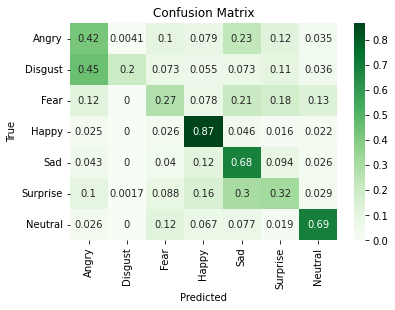

In [5]:
#define emotions
emotions = ['Angry', 'Disgust', 
                     'Fear', 'Happy', 'Sad', 
                     'Surprise', 'Neutral']

#emotion labels to int values
emotions_lab = {0:'Angry', 1: 'Disgust', 
                2:'Fear', 3:'Happy', 4:'Sad', 
                5:'Surprise', 6:'Neutral'}

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#predictions on test set
y_pred = model.predict(test_X)
#convert predictions 
y_pred_labels = [emotion_dict[np.argmax(pred)] for pred in y_pred]
#map labels to emotions-no.
y_true_labels = [emotion_dict[np.argmax(label)] for label in test_y]

#confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

#plot matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=selected_emotions, 
            yticklabels=selected_emotions)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()